# Parte 3 - Sección 12: Classificación con regresión logística

In [74]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [75]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

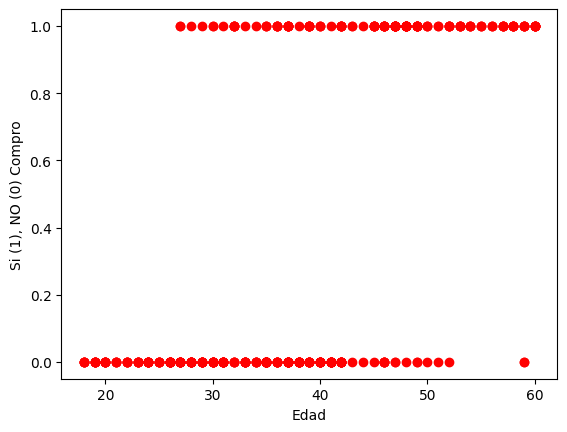

In [76]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y, color= 'red')
plt.xlabel('Edad')
plt.ylabel('Si (1), NO (0) Compro')
plt.show()

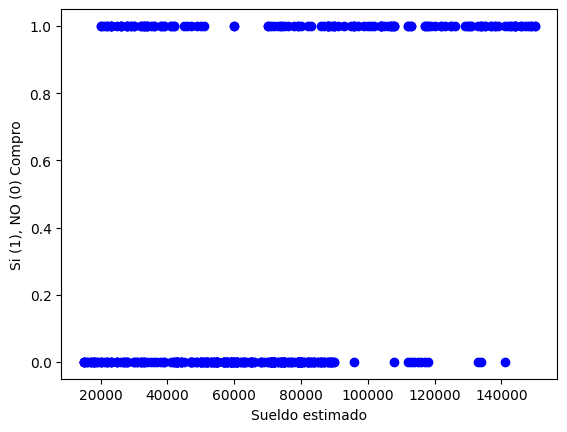

In [77]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], y, color= 'blue')
plt.xlabel('Sueldo estimado')
plt.ylabel('Si (1), NO (0) Compro')
plt.show()

In [78]:
# Separación de datos en entrenamiento y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [79]:
# Estandarización de datos para mejor precisción
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)
print('¡Modelo entrenado!')

¡Modelo entrenado!


In [81]:
# Predecir un valor, supongamos que una persona tiene 30 años y su sueldo estimado es de 87000
classifier.predict([[30, 87000]]) # Si compraria según el modelo

array([1])

In [82]:
y_pred = classifier.predict(X_test)
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
75,0,0
76,0,1
77,0,0
78,1,1


In [83]:
# Revisar la precisión del modelo con una matriz de cofusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Aciertos de SI: ', cm[0][0])
print('Errores de SI: ', cm[0][1])
print('Errores de NO: ', cm[1][0])
print('Aciertos de NO: ', cm[1][1])


[[57  1]
 [ 5 17]]
Aciertos de SI:  57
Errores de SI:  1
Errores de NO:  5
Aciertos de NO:  17


In [84]:
# Revisar la presición del modelor con una metrica
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.925

C:\Users\mario\AppData\Local\Temp\ipykernel_21964\1208432997.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


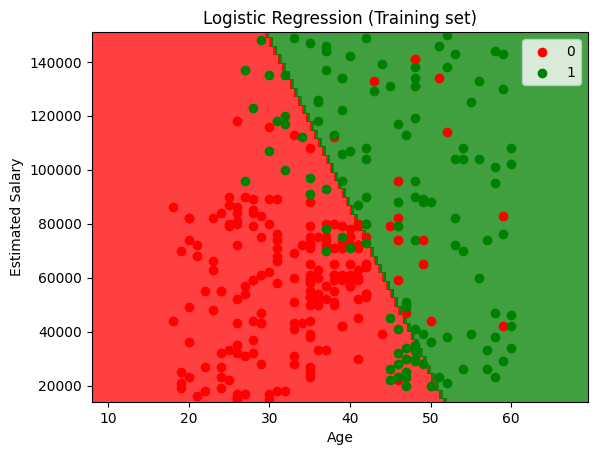

In [85]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_21964\3855652988.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


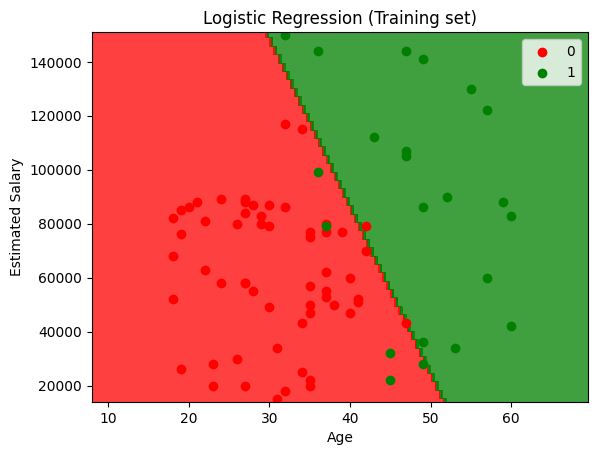

In [86]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()